# Análisis factorial

Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from scripts.dataframe_manager import ArrayToDFTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Cargar los datos

In [2]:
# Cargar datos
df = pd.read_csv('../datasets/profiles/profiles_bots.csv')

Información de los datos

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   total_chars_name           10000 non-null  float64
 1   total_chars_description    10000 non-null  float64
 2   total_chars_username       10000 non-null  float64
 3   name_equals_username       10000 non-null  float64
 4   total_numbers_name         10000 non-null  float64
 5   total_numbers_username     10000 non-null  float64
 6   total_emojis_name          10000 non-null  float64
 7   total_emojis_username      10000 non-null  float64
 8   total_words_description    10000 non-null  float64
 9   total_emojis_description   10000 non-null  float64
 10  total_numbers_description  10000 non-null  float64
 11  total_words_name           10000 non-null  float64
 12  followers                  9982 non-null   float64
 13  friends                    9975 non-null   floa

Estadísticas de los datos

In [4]:
print(df.describe())

       total_chars_name  total_chars_description  total_chars_username  \
count      10000.000000              10000.00000          10000.000000   
mean          12.817100                 47.35640             12.047300   
std            7.539823                 52.17223              3.390724   
min            0.000000                  0.00000              3.000000   
25%            8.000000                  0.00000             10.000000   
50%           12.000000                 26.00000             12.000000   
75%           16.000000                 88.00000             14.000000   
max           63.000000                174.00000             30.000000   

       name_equals_username  total_numbers_name  total_numbers_username  \
count          10000.000000        10000.000000            10000.000000   
mean               0.022100            0.134500                1.468200   
std                0.147016            0.735706                2.255238   
min                0.000000      

Matriz de correlación

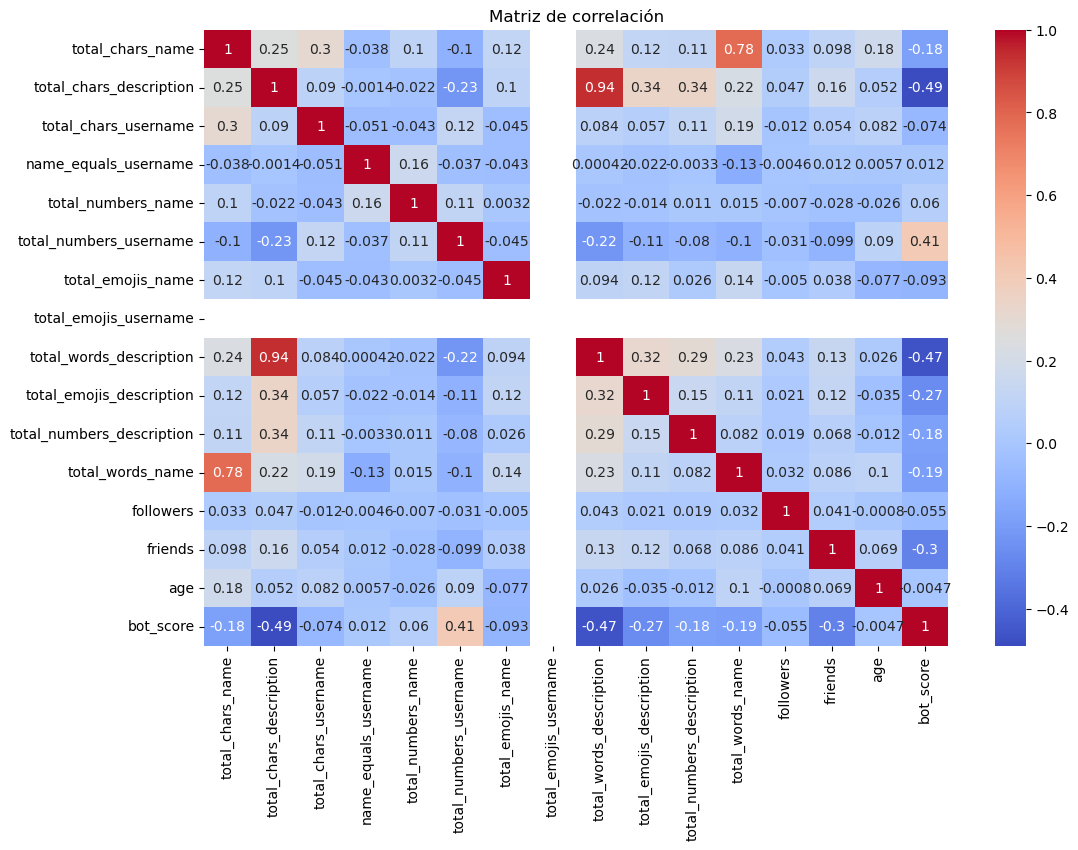

In [5]:
# Correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

In [6]:
print(df.isnull().sum())

total_chars_name               0
total_chars_description        0
total_chars_username           0
name_equals_username           0
total_numbers_name             0
total_numbers_username         0
total_emojis_name              0
total_emojis_username          0
total_words_description        0
total_emojis_description       0
total_numbers_description      0
total_words_name               0
followers                     18
friends                       25
age                          409
gen                          409
org                          410
bot_score                      0
dtype: int64


In [7]:
# Seleccionar columnas categóricas y numéricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nColumnas categóricas:", categorical_cols)
print("Columnas numéricas: ", numerical_cols)


Columnas categóricas: ['gen', 'org']
Columnas numéricas:  ['total_chars_name', 'total_chars_description', 'total_chars_username', 'name_equals_username', 'total_numbers_name', 'total_numbers_username', 'total_emojis_name', 'total_emojis_username', 'total_words_description', 'total_emojis_description', 'total_numbers_description', 'total_words_name', 'followers', 'friends', 'age', 'bot_score']


In [8]:
categorical_cols.append('age')
numerical_cols.remove('age')
numerical_cols.remove('bot_score')
print("\nColumnas categóricas:", categorical_cols)
print("Columnas numéricas: ", numerical_cols)


Columnas categóricas: ['gen', 'org', 'age']
Columnas numéricas:  ['total_chars_name', 'total_chars_description', 'total_chars_username', 'name_equals_username', 'total_numbers_name', 'total_numbers_username', 'total_emojis_name', 'total_emojis_username', 'total_words_description', 'total_emojis_description', 'total_numbers_description', 'total_words_name', 'followers', 'friends']


In [9]:
features = df.columns.tolist()
features.remove('bot_score') 
features

['total_chars_name',
 'total_chars_description',
 'total_chars_username',
 'name_equals_username',
 'total_numbers_name',
 'total_numbers_username',
 'total_emojis_name',
 'total_emojis_username',
 'total_words_description',
 'total_emojis_description',
 'total_numbers_description',
 'total_words_name',
 'followers',
 'friends',
 'age',
 'gen',
 'org']

In [10]:
preprocessor_imputer = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols),
        ('cat', SimpleImputer(strategy='most_frequent'), categorical_cols),
    ],
    remainder='passthrough'
    )

preprocessor_encoder = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OrdinalEncoder(), categorical_cols)   
    ],
    remainder='passthrough'
    )

# Opcional: Agregar codificación si lo deseas después de la imputación
full_pipeline = Pipeline([
    ('imputer', preprocessor_imputer),
    ('to_df_1', ArrayToDFTransformer(features)),
    ('encoder', preprocessor_encoder),
    ('to_df_2', ArrayToDFTransformer(features)),
    ('final', 'passthrough')
])

In [11]:
X = df[features]
y = df['bot_score']

In [12]:
X

,total_chars_name,total_chars_description,total_chars_username,name_equals_username,total_numbers_name,total_numbers_username,total_emojis_name,total_emojis_username,total_words_description,total_emojis_description,total_numbers_description,total_words_name,followers,friends,age,gen,org
0,42.0,8.0,10.0,0.0,0.0,4.0,3.0,0.0,1.0,0.0,1.0,7.0,195.0,463.0,3.0,M,N
1,24.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,2.0,M,N
2,15.0,30.0,14.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,71.0,2.0,M,N
3,1.0,0.0,13.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,88.0,0.0,M,N
4,26.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,30.0,330.0,0.0,F,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,14.0,42.0,9.0,0.0,0.0,1.0,0.0,0.0,8.0,5.0,12.0,2.0,14782.0,1514.0,NaN,NaN,NaN
9996,39.0,91.0,12.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,5.0,689.0,4247.0,1.0,M,N
9997,13.0,15.0,13.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,39.0,0.0,M,N
9998,12.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,14.0,271.0,1.0,F,N


In [13]:
full_pipeline.fit(X)

Pipeline(steps=[('imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', SimpleImputer(),
                                                  ['total_chars_name',
                                                   'total_chars_description',
                                                   'total_chars_username',
                                                   'name_equals_username',
                                                   'total_numbers_name',
                                                   'total_numbers_username',
                                                   'total_emojis_name',
                                                   'total_emojis_username',
                                                   'total_words_description',
                                                   'total_emojis_description',
                                                   'total_nu...
                                                   'total_numbers_name',
                                                   'total_numbers_username',
                                                   'total_emojis_name',
                                                   'total_emojis_username',
                                                   'total_words_description',
                                                   'total_emojis_description',
                                                   'total_numbers_description',
                                                   'total_words_name',
                                                   'followers', 'friends']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['gen', 'org', 'age'])])),
                ('to_df_2',
                 <scripts.dataframe_manager.ArrayToDFTransformer object at 0x77afd093b3d0>),
                ('final', 'passthrough')])

In [14]:
X_processed = full_pipeline.named_steps['to_df_2'].get_dataframe()

Modelo

In [15]:
fa = FactorAnalysis(n_components=5, random_state=42)
X_fa = fa.fit_transform(X_processed)

In [16]:
X_fa

array([[-0.34247435,  4.26500174, -0.62051685, -0.29296867,  0.1859594 ],
       [-0.71709078,  1.86106818, -0.16527836, -0.21626553, -0.10759692],
       [-0.38819778,  0.32861917,  0.04747711,  0.04825191, -0.39590461],
       ...,
       [-0.52700673,  0.52509246, -0.07723035, -0.53571841,  0.51488845],
       [-0.89194494,  0.14293937, -0.73970958, -0.24738639,  0.17890794],
       [-0.18156481, -0.94479435,  0.12635392, -0.24418811,  0.26923878]])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_fa, y, test_size=0.2, random_state=42)

In [28]:
# Entrenamiento de modelo KNN
knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100)

In [29]:
# Evaluación del modelo
y_pred = knn.predict(X_test)
print("\nMétricas de regresión:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Métricas de regresión:
RMSE: 1.3426178834596525
MAE: 1.1129165174007158
R^2 Score: 0.350112751501503
